In [1]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice, AnalogDevice
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipBackend
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('../code/')
import benchmark_utils as bmu
import density_utils as du
import detuning_scale_utils as dsu

# Import stuff

In [2]:
# The 3D-RISM density slices are saved as pickled files in the folder MUP1.
# They are indexed by a number (see d_list) which represents the distance in Angstrom
# from the central slice.

d_list = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5]

# import slices
path = "../MUP1/MUP1_logfilter8_slices/"
basename = "_density_slice_MUP1_logfilter8.p"
densities = []
for d in d_list:
    filename = path + f"d{d}" + basename
    with open(filename, 'rb') as file_in:
         densities.append(pickle.load(file_in))
            
# import slice coordinates (these are 3D coordinates in
# angstroms, they are needed at the very end to map
# excited qubits to positions in the protein cavity)
path = "../MUP1/MUP1_logfilter8_points/"
basename = "_plane_points_MUP1.p"
points = []
for d in d_list:
    filename = path + f"d{d}" + basename
    with open(filename, 'rb') as file_in:
         points.append(pickle.load(file_in))


In [3]:
# The register associated to each slide can be found in the folder nb/registers.
# Two types of files are saved there:
# - position_<#>.npy: the positions of the qubits in micrometers, as if they were in the QPU
# - rescaled_position_<#>.npy: the positions of the qubits on the same scale as the density slices

# import registers
path = "registers/"
basename = "position_"
positions = []
registers = []
for i in range(len(d_list)):
    with open(f'registers/position_{i}.npy', 'rb') as file_in:
        pos = np.load(file_in)
    positions.append(pos)
    registers.append(Register.from_coordinates(pos)) # this is to create a Pulser register object

basename = "rescaled_position_"
rescaled_positions = []
for i in range(len(d_list)):
    with open(f'registers/rescaled_position_{i}.npy', 'rb') as file_in:
        res_pos = np.load(file_in)
    rescaled_positions.append(res_pos)

Processing density 1 of 6
Density 1 has 4 qubits


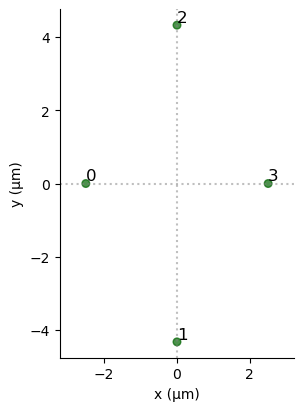

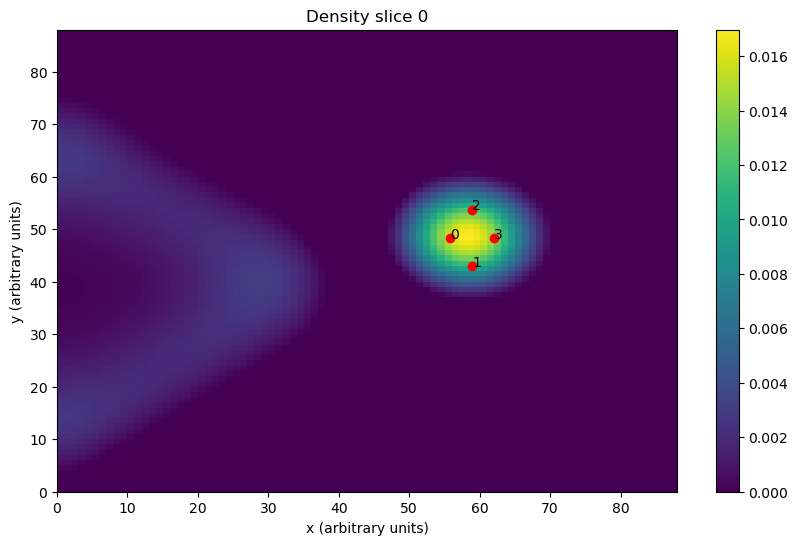

Processing density 2 of 6
Density 2 has 9 qubits


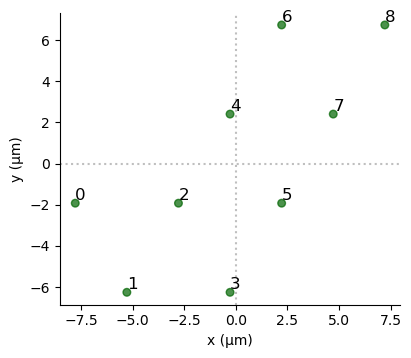

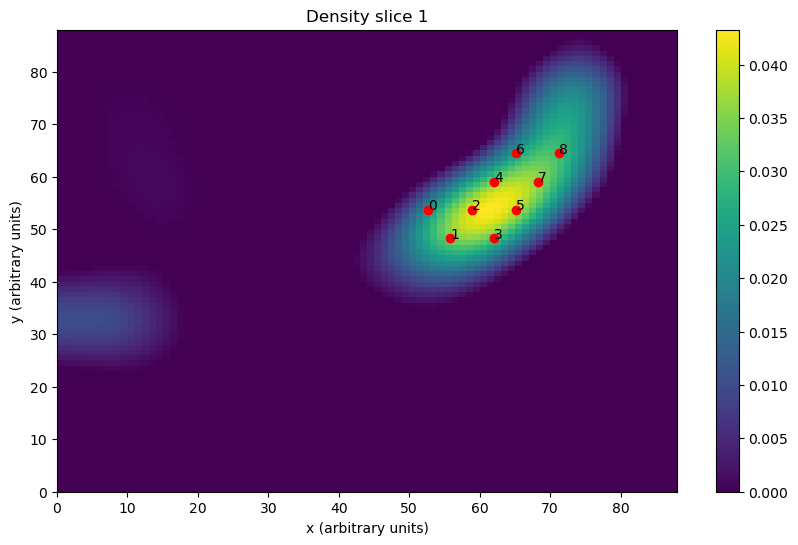

Processing density 3 of 6
Density 3 has 14 qubits


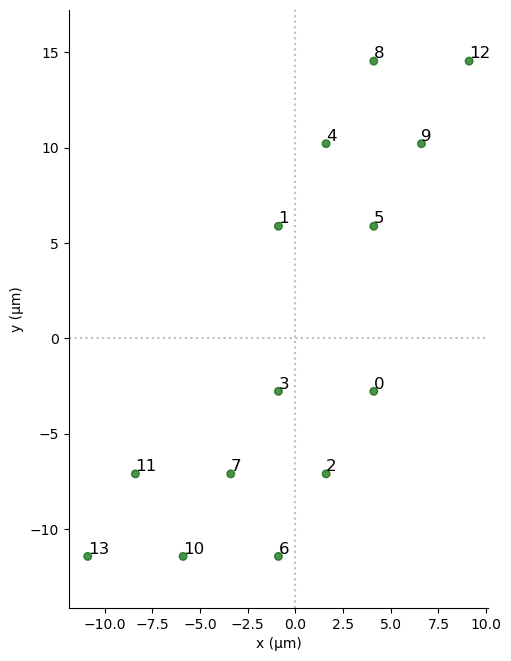

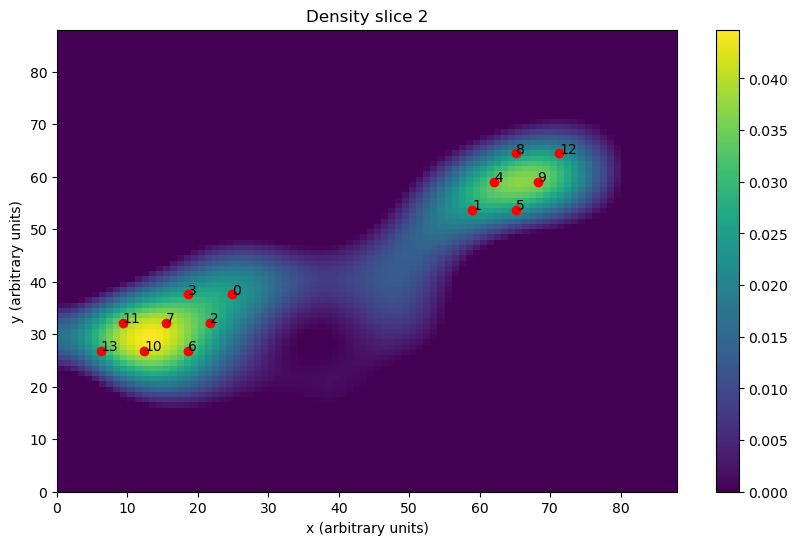

Processing density 4 of 6
Density 4 has 14 qubits


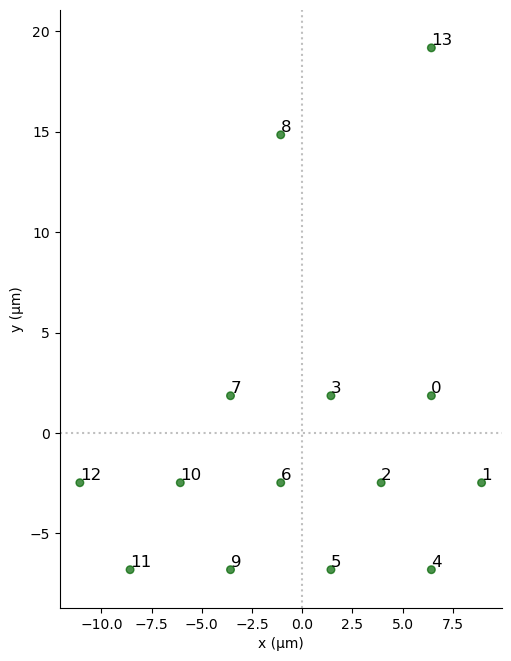

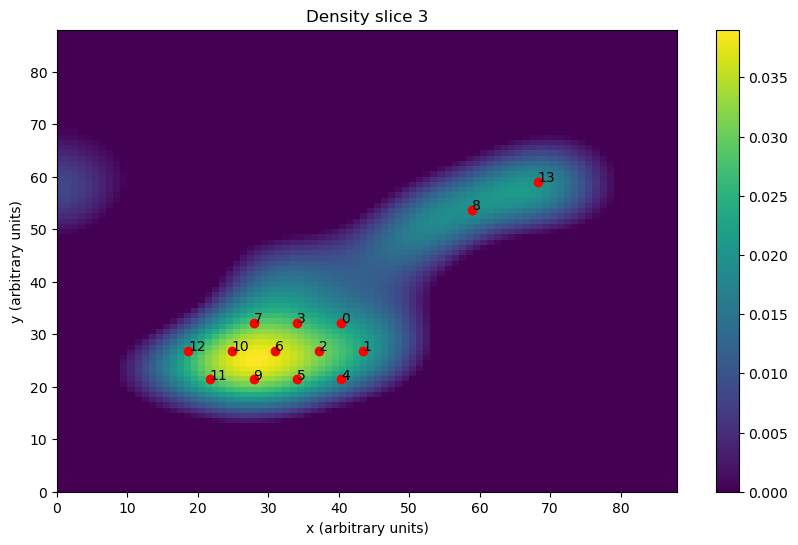

Processing density 5 of 6
Density 5 has 13 qubits


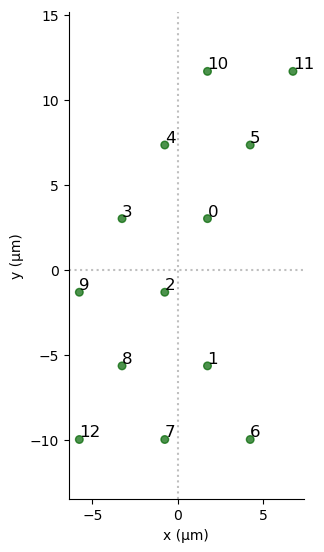

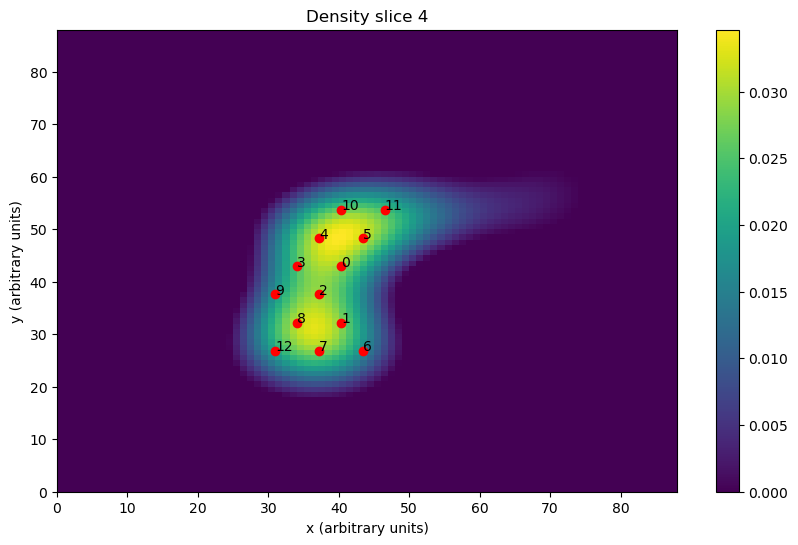

Processing density 6 of 6
Density 6 has 8 qubits


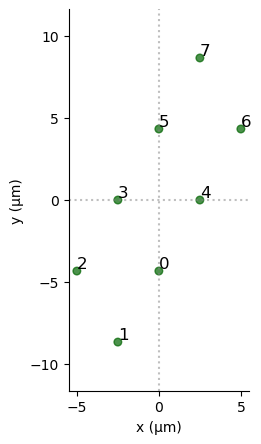

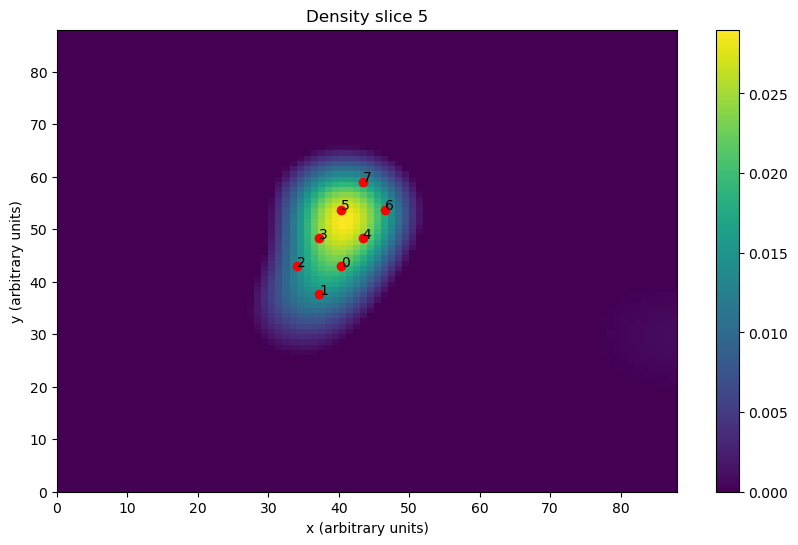

In [4]:
# Visualize registers and densities

for k, density in enumerate(densities):
    print(f"Processing density {k+1} of {len(densities)}")
    reg = registers[k]
    pos = positions[k]
    rescaled_pos = rescaled_positions[k]
    n = len(pos)
    print(f"Density {k+1} has {n} qubits")
    reg.draw()
    fig, ax = dsu.plot_density(density, rescaled_pos, title=f"Density slice {k}")

    plt.show()

# Parameter tuning

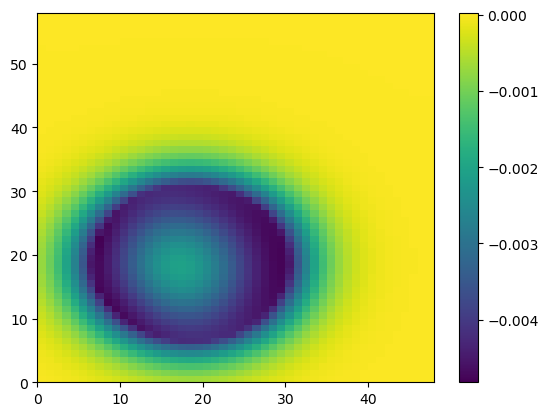

In [5]:
# The algorithm requires a choice of variance and amplitude for each Gaussian.
# We used a very heuristic method: take the first slice, and assume that it's composed
# of exactly one Gaussian. Given that assumption, we tried a bunch of values for
# variance and amplitude and chose the ones that worked best

variance = 50
amplitude = 6

G = amplitude*dsu.gaussian_mixture(densities[0].shape, variance, [(58,48.2)])
plt.pcolormesh((densities[0]-G)[30:,40:])
plt.colorbar()
plt.show()

# Quantum solution

Processing density 1 of 6
Density 1 has 4 qubits


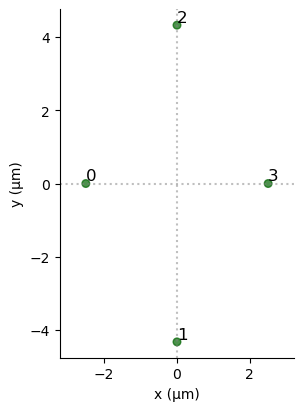

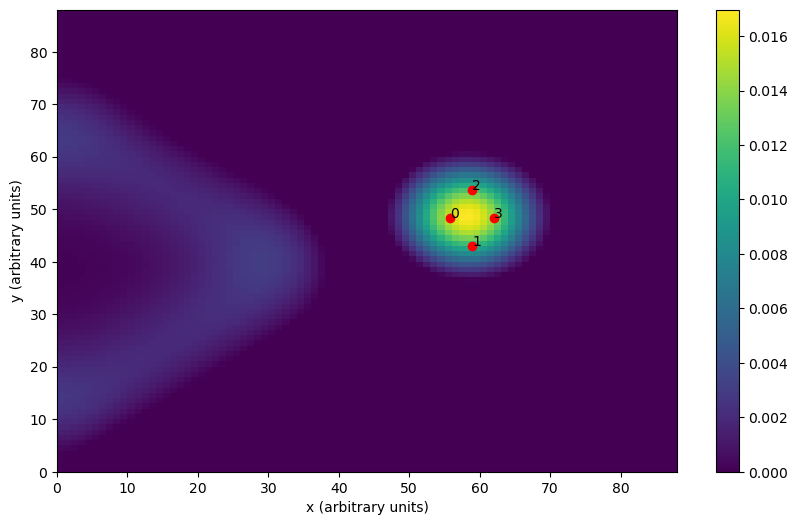

0001 416 -0.009692037638099362
1000 292 -0.010743767178636635
0000 290 0
0100 2 -0.008928120382230561
The best solution is:  1000


Processing density 2 of 6
Density 2 has 9 qubits


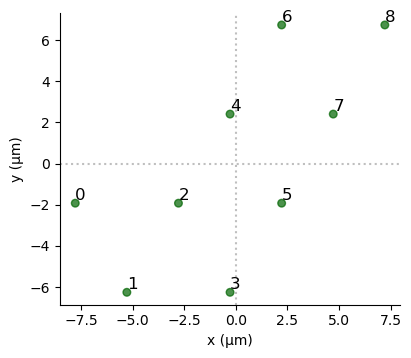

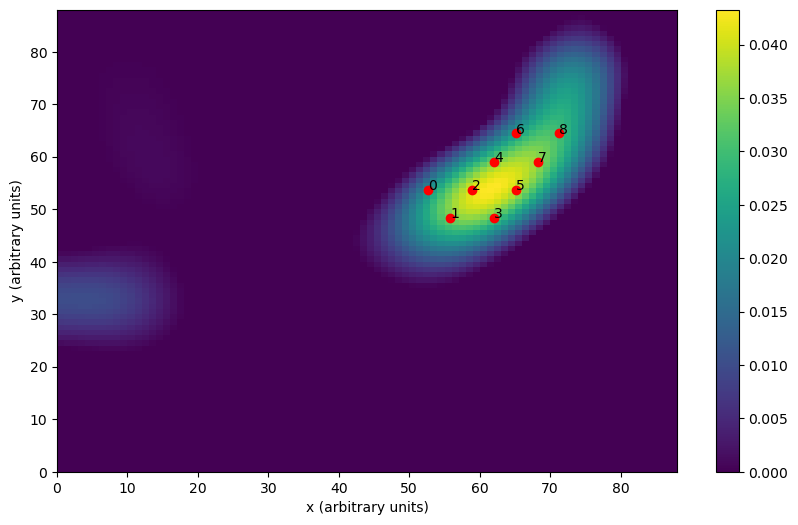

001000010 361 -0.01527712991696159
000001000 272 -0.0408843632707674
000000010 227 -0.03797858020238196
001000000 69 -0.04167669042965067
000010000 40 -0.03937355698387364
010000010 9 -0.043367911259863785
000001001 5 -0.018715154816427843
000000000 4 0
100000010 3 -0.03694633208790532
000001100 2 -0.009070204446782734
001000100 2 -0.02111957588964574
000100010 1 -0.021183307647987364
000110000 1 -0.011321240145499303
010000000 1 -0.03523304249696386
010001001 1 0.019849369335783833
010010000 1 -0.02148550304974619
100001000 1 -0.016574730164681487
The best solution is:  010000010


Processing density 3 of 6
Density 3 has 14 qubits


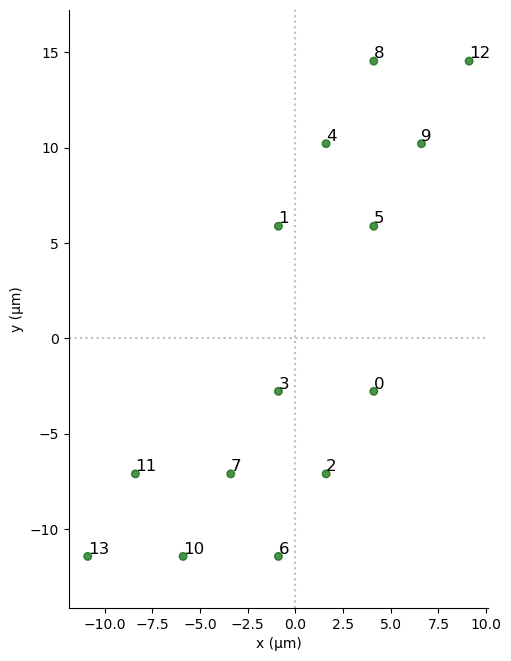

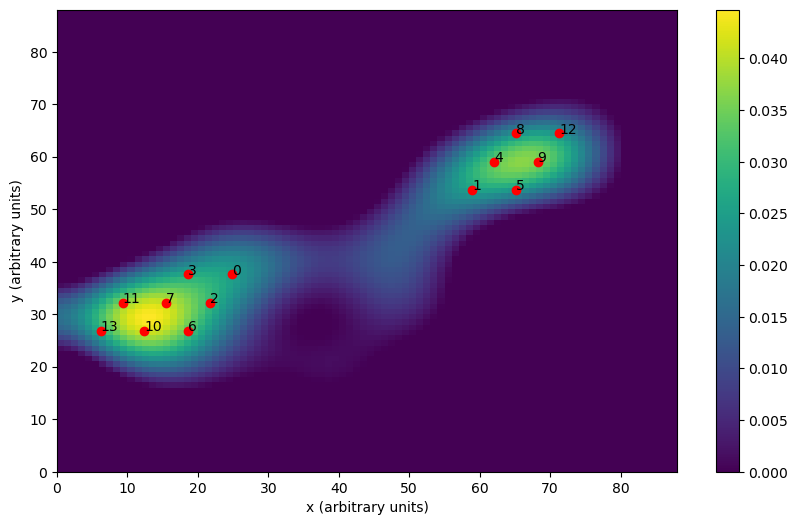

00001001000000 152 -0.07443814922545679
00001010000000 139 -0.07042267309528194
00101000001000 108 -0.0462991748637848
00000010010000 81 -0.06959628082740014
00000001010000 78 -0.0736117679582156
00100000011000 74 -0.0454736011204258
00100100001000 56 -0.043651017641281875
00000101000000 51 -0.07179000300359446
00000110000000 45 -0.0677745048721384
00101000000100 22 -0.05244444709994767
01000010000000 17 -0.06688100360445806
01100000011000 16 -0.008235733133541735
01100000001000 15 -0.042747963172085277
01000001010000 12 -0.03638432080263614
01000010010000 11 -0.03236883367182069
00100000010100 9 -0.05161887337580669
01000001000000 9 -0.07089649073527352
00101000000000 8 -0.06851354829564646
00001010000001 7 -0.04845654592667634
00000010000000 6 -0.03973031004496647
00100000010000 6 -0.06768797176361675
00000000010100 5 -0.0669179717237926
00000001010001 5 -0.0403885966122884
00000101000001 5 -0.03856683157022715
00001001000001 5 -0.04121497777287145
00001000000100 4 -0.067744410179644

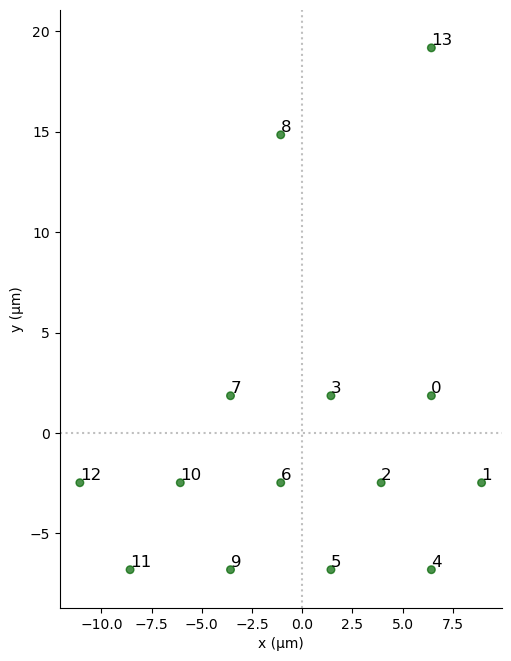

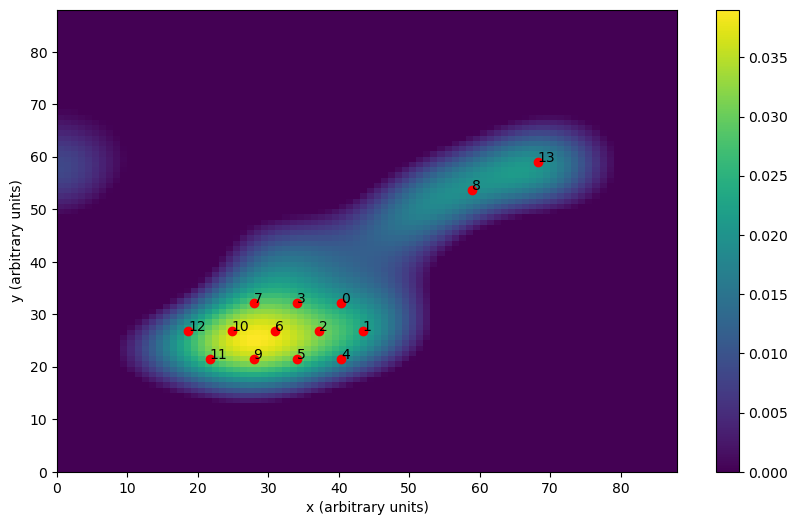

00000010000000 234 -0.046372357884776
00100000001000 151 -0.028923031519120443
00010000010000 99 -0.02745240684861995
00000000001000 84 -0.04177200800973407
00000010000001 63 -0.06100172796093583
00100000000000 51 -0.04027211994047757
00000010100000 45 -0.064696167843508
00010000010001 32 -0.04207306716709351
00000000001001 30 -0.05640195776140376
00100000101000 29 -0.04700500606995954
00100000001001 28 -0.04354774966609995
00100000010000 22 -0.0163176946465022
00000000101000 18 -0.060150151298138575
00100000100000 16 -0.058363406670503826
00100000000001 13 -0.05489688998139333
00010000110000 10 -0.045307457380345445
00100000000100 8 -0.043583205548019886
00100000110000 7 -0.03440374977183827
10000000001000 7 -0.044937828357385835
00000010000100 6 -0.015149014216729269
00010000000000 6 -0.040149787858615546
00100000010001 6 -0.030942435539472735
00000000010000 5 -0.0404237154210956
00010000000100 3 -0.04346087346615786
10000010000000 3 -0.015003748956838724
00000000000000 2 0
000000000

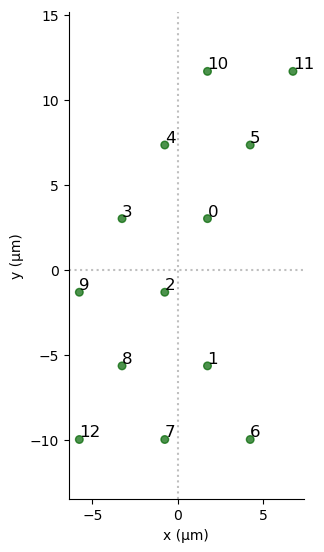

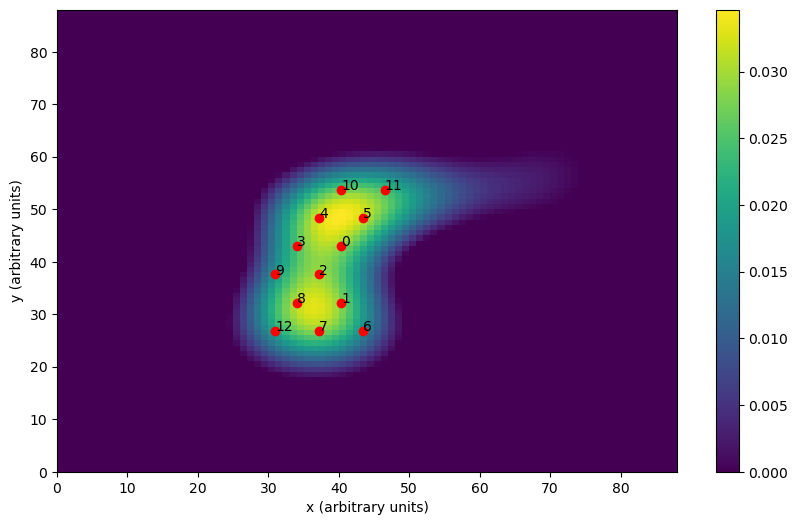

0000010010000 192 -0.046538454808655594
1000000010000 154 -0.017475061544701506
0010010000000 124 -0.0176723355799941
0010010100000 117 0.028298555648851274
0010100000000 83 -0.006943270466971581
0100010000000 51 -0.03540193900301909
1000000100000 45 -0.035270445467001255
0000100010000 37 -0.03754208293525721
1100000000000 32 -0.004605852499440871
0010100100000 30 0.04102371839551606
0100100000000 25 -0.035929918173976366
0000010000000 20 -0.03354913871414223
0010011000000 13 0.027028873001168064
0000010100000 9 -0.05195638820036796
0010000100000 9 -0.0006928280022022934
1000000000000 7 -0.03728748148615307
0000011010000 6 0.009419798056486364
0010010000001 5 0.017615179961098456
0000000100000 4 -0.027826675420330217
0010000000100 4 -0.03438322081190573
1000000010010 4 0.017039826065159146
0000000010000 3 -0.03330867648963974
0000100100000 3 -0.05048826973768296
0100000000000 3 -0.0316965117283589
0000000000000 2 0
0010000000000 2 -0.037244293296943176
0010101000000 2 0.035761840480548

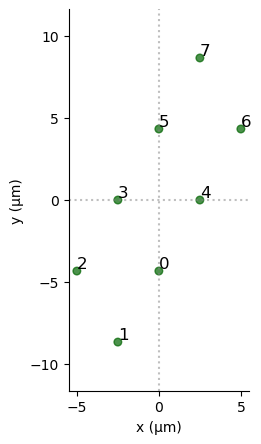

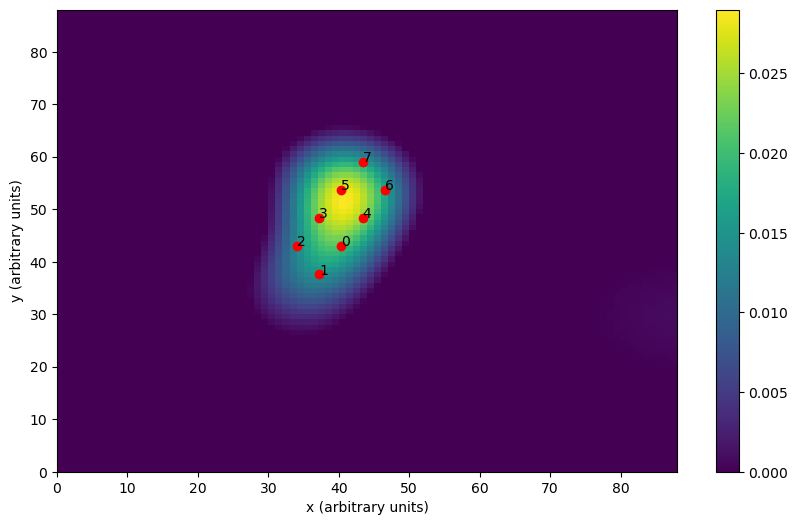

10000100 328 0.019970738890725415
00010000 290 -0.02404680978135616
00001000 135 -0.022806187285666586
00000100 79 -0.023073821946831514
10000000 58 -0.021333579877514046
00000000 48 0
00010001 12 0.014561589182229278
01010000 10 0.02554451777130937
00100100 9 0.012067452731102195
00010010 6 0.023339976679715598
00100000 5 -0.017979821753157488
00101000 5 0.0235921316762469
10000010 4 0.014796162299577937
10000001 3 -0.0060025659055378735
00000010 2 -0.016991354253999214
00001001 2 0.027059255961898628
01001000 2 0.015528095983019165
00101001 1 0.09377693531893848
01000100 1 -0.008016923669755024
The best solution is:  00010000




In [6]:
# choose the maximum detuning allowed (it's needed later)
max_det = AnalogDevice.channel_objects[0].max_abs_detuning-1

# choose a blockade radius (in micrometers)
# which in turns defines a Rabi frequency
brad = 7
omega = AnalogDevice.rabi_from_blockade(brad)

# choose a pulse duration
T = 3000

best_solutions = []
samplings = []
for k, density in enumerate(densities):
    
    # print some stuff, unimportant
    print(f"Processing density {k+1} of {len(densities)}")
    reg = registers[k]
    pos = positions[k]
    rescaled_pos = rescaled_positions[k]
    n = len(pos)
    print(f"Density {k+1} has {n} qubits")
    reg.draw()
    fig, ax = dsu.plot_density(density, rescaled_pos)
    plt.show()
    
    # use function to calculate the one-body coefficients of the QUBO
    gamma_list = dsu.gamma_list(density, rescaled_pos, variance)
    
    # roundabout way of finding the scale factor between the QPU units
    # and the density units, it's needed in the next block
    distances_density = dsu.find_possible_distances(rescaled_pos)
    distances_register = dsu.find_possible_distances(pos)
    scale = distances_density[0]/distances_register[0]
    
    # calculate mapping between one-body coefficients of the QUBO
    # and detunings
    dets = np.array([item for item in gamma_list])
    for i in range(n):
        # this line shifts every value by a quantity that is the mean of neighbouring detunings
        # where a neighbour is defined as atoms whithin a blockade radius distance
        dets[i] -= np.mean(dsu.neighbouring_gamma_list(density, rescaled_pos, rescaled_pos[i], scale*brad, variance))
    # the next line line rescales every detuning so that the maximum one
    # turns out to be `max_det` (see first line of this cell)
    dets *= max_det/np.max(np.abs(dets))
    
    # Pulser stuff begins --------------------------
    seq = Sequence(reg, MockDevice)
    for i in range(n):
        # add an adiabatic pulse for every qubit
        seq.declare_channel(f'ch{i}', 'rydberg_local')
        seq.target(i, f'ch{i}')
        pulse = Pulse(InterpolatedWaveform(T, [0, omega, 0]), InterpolatedWaveform(T, [-max_det, 0, dets[i]]), 0)
        seq.add(pulse, f'ch{i}')
    # uncomment next line if you want to visualize the pulse sequence
    # seq.draw()

    # run simulation
    sim = QutipBackend(seq)
    res = sim.run()
    samples = res.sample_final_state(1000)
    # Pulser stuff ends ----------------------------


    # The next block calculates the cost (from the QUBO) of each
    # bitstring sampled with the analog algorithm 
    quantum_solutions = sorted(samples.items(), key=lambda x: x[1], reverse=True)
    quantum_plus_classical_solutions = []
    for bitstring, count in quantum_solutions:
        # calculate QUBO cost of bitstring
        ising = dsu.ising_energies(rescaled_pos, density, variance, [bitstring], brad, amp=amplitude)
        # the next try-except block is needed because the QUBO cost calculated in the line above
        # resturns empty whenever the blockade constraint is not respected
        try:
            i_bit = ising[0][0]
            i_en = ising[0][1]
            quantum_plus_classical_solutions.append((bitstring, count, i_en)) 
        except IndexError:
            i_bit = bitstring
            i_en = 1e10
            quantum_plus_classical_solutions.append((bitstring, count, i_en)) 
        print(bitstring, count, i_en)
    # print the best solution, which is defined as the bitstring sampled with the analog algorithm
    # that has the lowest cost in the QUBO
    best_solution = sorted(quantum_plus_classical_solutions, key=lambda x: x[2], reverse=False)[0][0]
    best_solutions.append(best_solution)
    samplings.append(np.array(quantum_plus_classical_solutions, dtype=object))
    print("The best solution is: ", best_solution)
    print()
    print()

# Visualize results

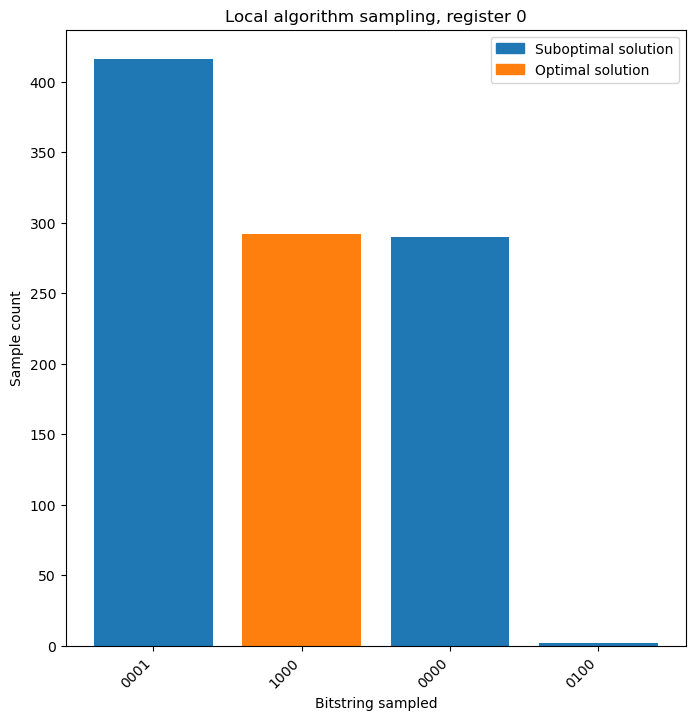

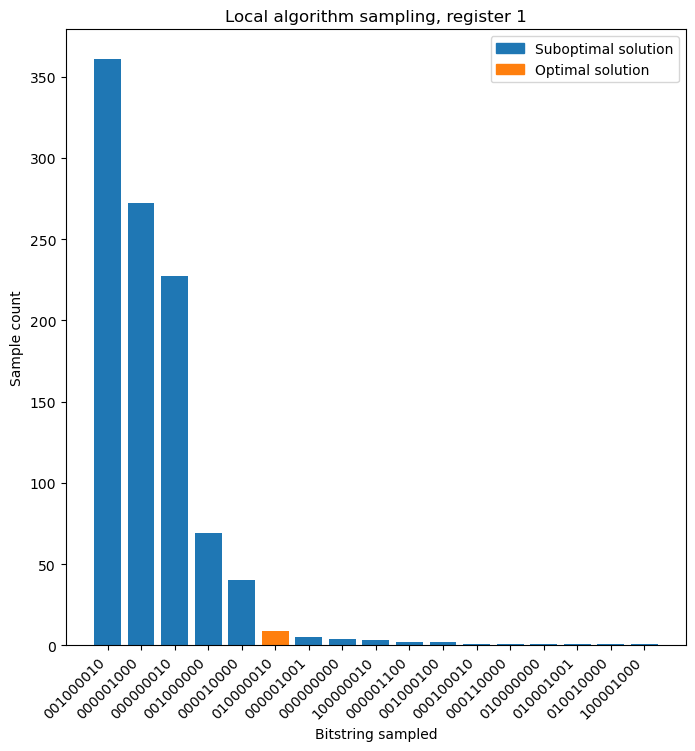

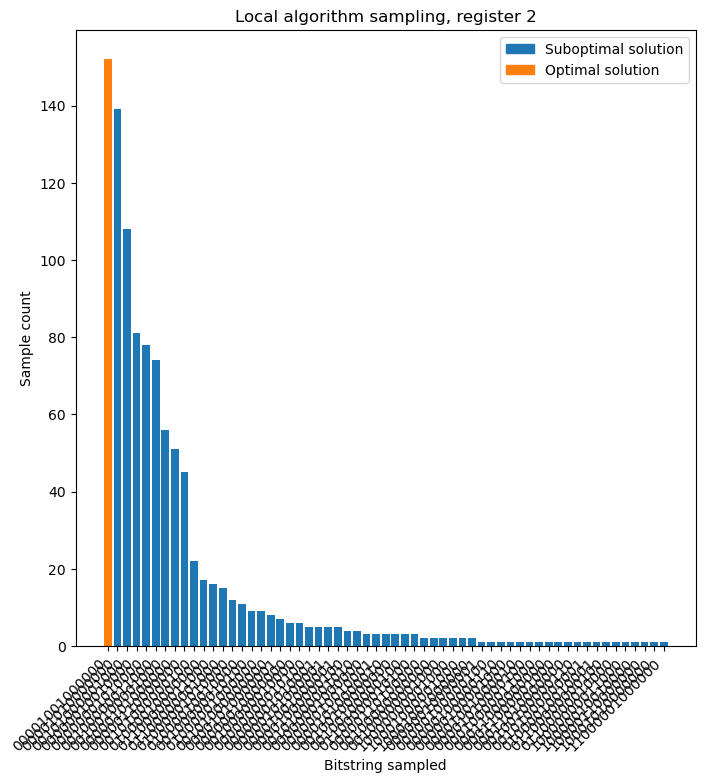

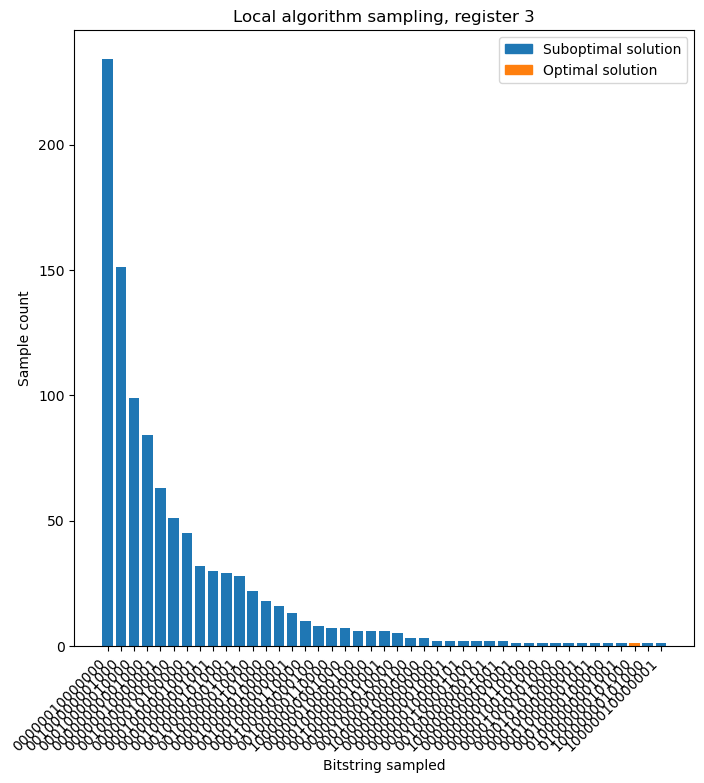

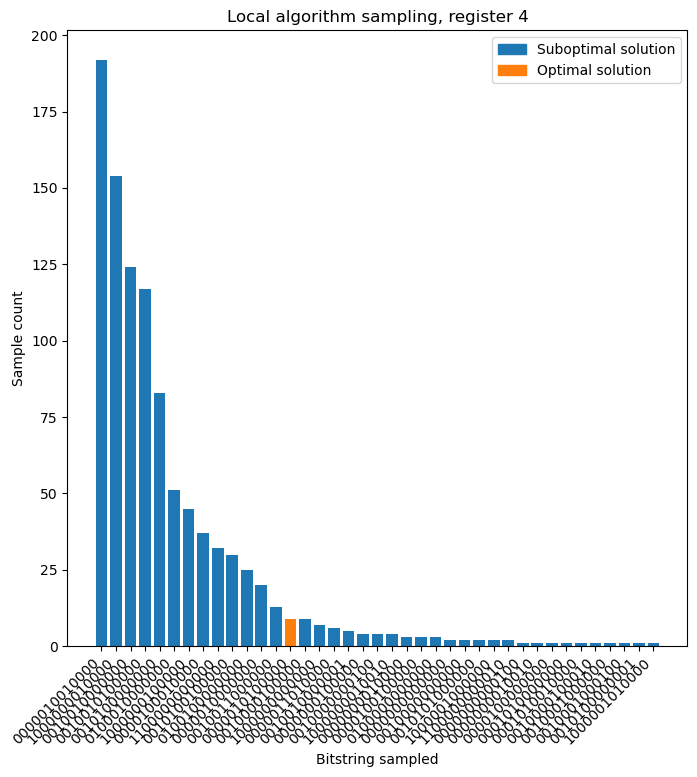

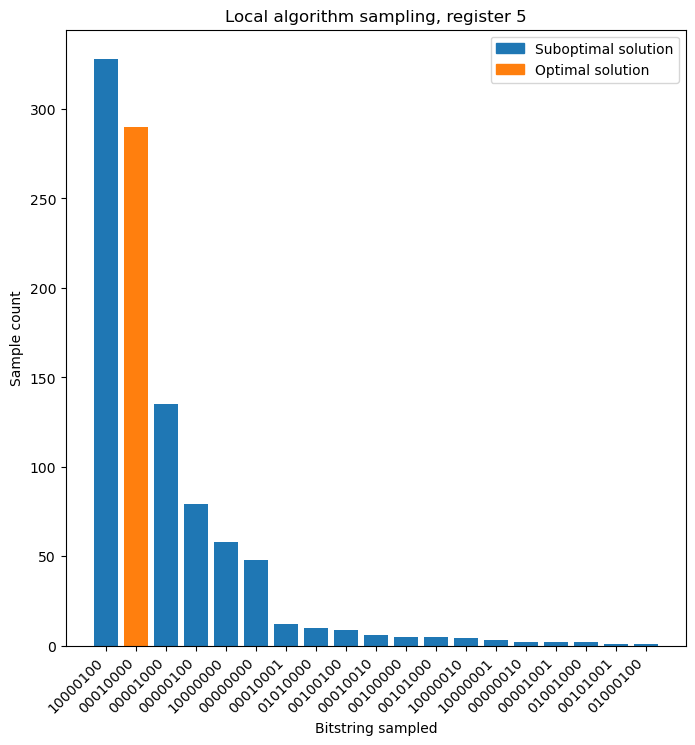

In [7]:
for i in range(len(samplings)):
    plt.figure(figsize=(8,8))
    plt.xlabel("Bitstring sampled")
    plt.ylabel("Sample count")
    plt.title(f"Local algorithm sampling, register {i}")
    plt.xticks(rotation=45, ha='right')
    colors = ['tab:blue' if item != best_solutions[i] else 'tab:orange' for item in samplings[i][:,0]]
    plt.bar(samplings[i][:,0], samplings[i][:,1], color=colors)
    colors = {'Suboptimal solution':'tab:blue', 'Optimal solution':'tab:orange'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.show()
    

# Remap bitstrings to water molecule positions in the protein cavity

In [8]:
# This next section is a bit convoluted, and that's because we are working with different objects
# at different scales:
# There's the qubit register, in micrometers
# There's the 2D density slices, in some arbitrary unit (they are 2D arrays with size 88x88)
# There's the positions of the qubits, rescaled to the same units of the 2D density slices
# And finally there's the full 3D density, in angstroms.
# The purpose of the next few cells is to go from the qubits (in micrometers), to positions
# in the protein cavity as 3D vectors (in angstroms).

In [9]:
# for each solution, find index of excited qubits
qubit_indices = []
for bitstring in best_solutions:
    ls = []
    for i,b in enumerate(bitstring):
        if b=='1':
            ls.append(i)
    qubit_indices.append(ls)

In [10]:
# from their indices, find positions of excited qubits
# (on the scale of the density slices, not in micrometers)
qubit_rescaled_positions = []
for i,indices in enumerate(qubit_indices):
    ls = []
    for idx in indices:
        ls.append(rescaled_positions[i][idx])
    qubit_rescaled_positions.append(ls)

In [11]:
# from the rescaled positions, find the indices on the 3D map
water_indices = []
for i,res_pos in enumerate(qubit_rescaled_positions):
    ls = []
    for pos in res_pos:
        ls.append((int(pos[1]), int(pos[0])))
    water_indices.append(ls)

In [12]:
# and finally from the indices find the water molecule positions
# in angstroms
water_positions = []
for i,slice in enumerate(water_indices):
    ls = []
    for idx_i, idx_j in slice:
        ls.append(points[i][idx_i,idx_j])
    water_positions.append(ls)